# Case Study: Media Company

Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

## Step-1 : Read and understand the data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sklearn, statsmodels.api as sm

In [76]:
# import data
media = pd.read_csv('mediacompany.csv')
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [77]:
media.drop(columns='Unnamed: 7', inplace=True)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [78]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [79]:
media['Day'] = pd.DatetimeIndex(media.Date).day
media['Month'] = pd.DatetimeIndex(media.Date).month
tag=0
for count in range(1,len(media['Day'])+1):
    media.loc[tag,'Day_Counter'] = count
    tag += 1
media['Day_Counter'] = media['Day_Counter'].astype('int')
media.drop(columns=['Day', 'Month'], inplace=True)
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_Counter
75,5/15/2017,313945,1808684,2226788,1398052759,1,0,76
76,5/16/2017,185689,1814227,2199844,1311961223,1,0,77
77,5/17/2017,142260,1755803,2225752,1248266254,1,0,78
78,5/18/2017,135871,1749654,2302789,1284859759,1,0,79
79,5/19/2017,108961,1746735,2279036,1246026846,1,0,80


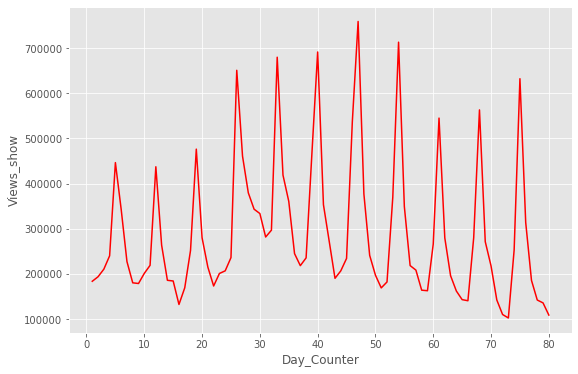

In [80]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(data=media, x='Day_Counter', y='Views_show', color='r')
plt.show()

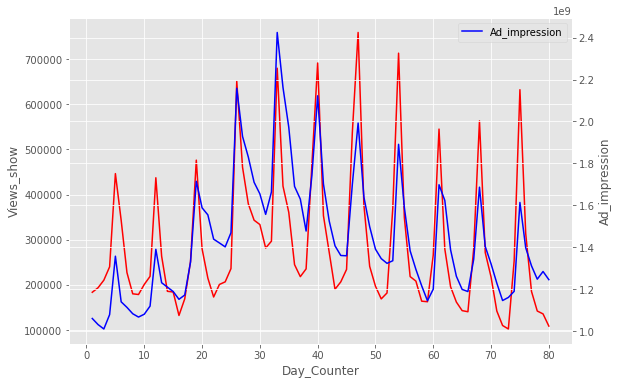

In [81]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(data=media, x='Day_Counter', y='Views_show', color='r')
ax2 = plt.twinx()
sns.lineplot(data=media, x='Day_Counter', y='Ad_impression', ax=ax2, color="b", label="Ad_impression")
plt.legend(loc='best')
plt.show()

In [82]:
# Weekday Weekend Classification
# 1 means Sunday, 7 means Saturday
media['weekday'] = (media['Day_Counter']+3)%7 # 3rd march 2017, the day 1 is wednesday, we add 3 and then find remainder of 7
media.weekday.replace(0,7, inplace=True) # Replace 0 with 7
media['weekday'] = media['weekday'].astype(int)

In [83]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_Counter,weekday
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,1,4
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,2,5
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,3,6
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,4,7
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,5,1


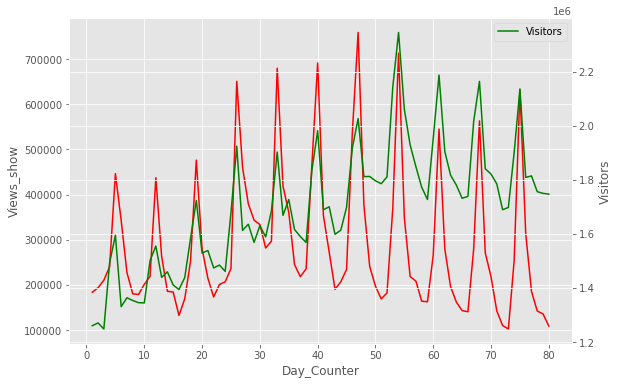

In [84]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(data=media, x='Day_Counter', y='Views_show', color='r')
ax2 = plt.twinx()
sns.lineplot(data=media, x='Day_Counter', y='Visitors', ax=ax2, color="g", label="Visitors")
plt.legend(loc='best')
plt.show()

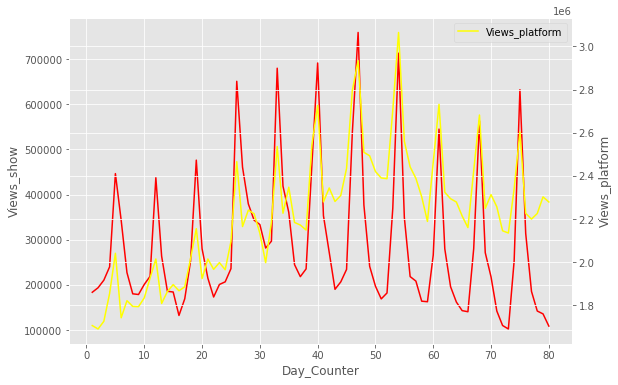

In [85]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(data=media, x='Day_Counter', y='Views_show', color='r')
ax2 = plt.twinx()
sns.lineplot(data=media, x='Day_Counter', y='Views_platform', ax=ax2, color="yellow", label="Views_platform")
plt.legend(loc='best')
plt.show()

### Linear Regression Model 1 (Visitors & weekday)

In [86]:
# X, y
X = media[['Visitors','weekday']]
y = media['Views_show']

In [87]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lm1 = sm.OLS(y, X_sm)
lm1_model = lm1.fit()
lm1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           8.01e-12
Time:                        15:19:59   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.720   -2.52e+05    1.75e+05
Visitors       0.2787      0.057      4.911      0.000       0.166       0.392
weekday    -3.591e+04   6591.205     -5.448      0.000    -4.9e+04   -2.28e+04
==============================================================================
Omnibus:                        2.684   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.653
Skew:                           0.423   Prob(JB):                        0.265
Kurtosis:                       2.718   Cond. No.                     1.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
print (lm1_model.params)

const      -38615.112787
Visitors        0.278681
weekday    -35908.350137
dtype: float64


### Linear Regression Model 2 (Visitors, Weekend)

In [89]:
media['weekend'] = media['weekday'].apply(lambda x : 1 if x == 1 or x==7 else 0)

In [90]:
# X, y
X = media[['Visitors','weekend']]
y = media['Views_show']

In [91]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lm2 = sm.OLS(y, X_sm)
lm2_model = lm2.fit()
lm2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.51e-12
Time:                        15:19:59   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
print (lm2_model.params)

const       -88325.277230
Visitors         0.193362
weekend     180702.696033
dtype: float64


###  Linear Regression Model 3 (Visitors, Weekend & Character A)

In [93]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Day_Counter', 'weekday',
       'weekend'],
      dtype='object')

In [94]:
# X, y
X = media[['Visitors','weekend', 'Character_A']]
y = media['Views_show']

In [95]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lm3 = sm.OLS(y, X_sm)
lm3_model = lm3.fit()
lm3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.53e-14
Time:                        15:19:59   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
print (lm3_model.params)

const          -47221.913254
Visitors            0.148026
weekend        181214.948506
Character_A     95424.646323
dtype: float64


### Linear Regression Model 4 (Visitors, Weekend, Character_A, Lag Views)

In [97]:
media['Lag_views'] = np.roll(media['Views_show'], 1) # Basically rotates the views_show by 1
media.Lag_views.replace(108961,0, inplace=True)

In [98]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_Counter,weekday,weekend,Lag_views
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [99]:
# X, y
X = media[['Visitors','weekend', 'Character_A', 'Lag_views']]
y = media['Views_show']

In [100]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lm4 = sm.OLS(y, X_sm)
lm4_model = lm4.fit()
lm4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           3.16e-21
Time:                        15:19:59   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      0.689   -1.78e+05    1.18e+05
Visitors        0.0659      0.047      1.394      0.167      -0.028       0.160
weekend      2.273e+05    2.4e+04      9.467      0.000    1.79e+05    2.75e+05
Character_A  5.527e+04   2.01e+04      2.748      0.008    1.52e+04    9.53e+04
Lag_views       0.4317      0.065      6.679      0.000       0.303       0.560
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.821
Skew:                          -0.130   Prob(JB):                        0.663
Kurtosis:                       3.423   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
print (lm4_model.params)

const          -29802.711587
Visitors            0.065870
weekend        227311.149966
Character_A     55270.950921
Lag_views           0.431655
dtype: float64


In [102]:
Xy = pd.concat([y,X], axis=1)

In [103]:
Xy.corr()

,Views_show,Visitors,weekend,Character_A,Lag_views
Views_show,1.000000,0.535290,0.659947,0.402533,0.417580
Visitors,0.535290,1.000000,0.470870,0.223093,0.200710
weekend,0.659947,0.470870,1.000000,0.101195,-0.144469
Character_A,0.402533,0.223093,0.101195,1.000000,0.320241
Lag_views,0.417580,0.200710,-0.144469,0.320241,1.000000


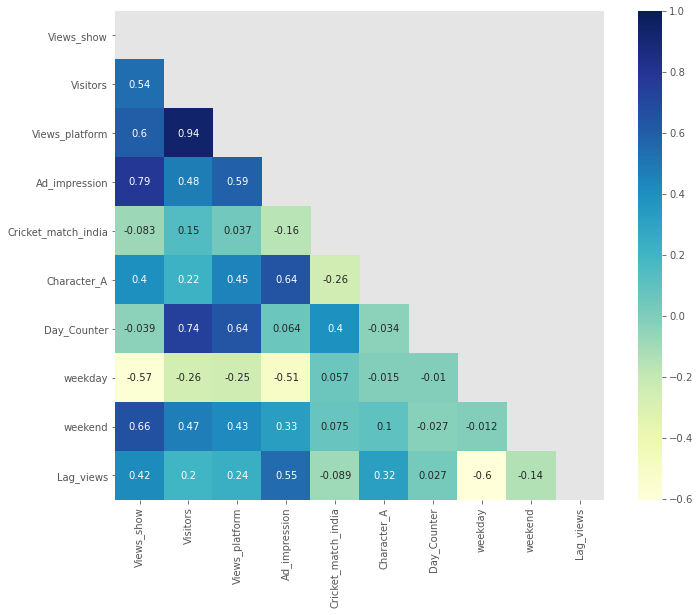

In [104]:
plt.figure(figsize=(12,9))
mask = np.zeros_like(media.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(media.corr(), mask=mask, vmax=1.0, square=True, annot=True, cmap="YlGnBu")
plt.show()

### Linear Regression Model 5 

In [105]:
# X, y
X = media[['Views_platform','weekend', 'Character_A']]
y = media['Views_show']

In [106]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lm5 = sm.OLS(y, X_sm)
lm5_model = lm5.fit()
lm5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           3.59e-15
Time:                        15:20:00   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.208      0.231   -3.19e+05    7.81e+04
Views_platform     0.1507      0.048      3.152      0.002       0.055       0.246
weekend         1.781e+05   2.78e+04      6.410      0.000    1.23e+05    2.33e+05
Character_A     7.062e+04    2.6e+04      2.717      0.008    1.89e+04    1.22e+05
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.153
Skew:                           0.061   Prob(JB):                        0.341
Kurtosis:                       2.206   Cond. No.                     2.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
print (lm5_model.params)

const            -120465.358077
Views_platform         0.150698
weekend           178096.989232
Character_A        70615.404147
dtype: float64


### Linear Regression Model 6 (Visitors, weekend, character A and Ad_impressions)

In [108]:
# X, y
X = media[['Visitors','weekend', 'Character_A', 'Ad_impression']]
y = media['Views_show']

In [109]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lm6 = sm.OLS(y, X_sm)
lm6_model = lm6.fit()
lm6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.10e-25
Time:                        15:20:00   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067      0.000   -4.22e+05   -1.45e+05
Visitors          0.0144      0.042      0.340      0.735      -0.070       0.099
weekend        1.485e+05   2.04e+04      7.296      0.000    1.08e+05    1.89e+05
Character_A   -2.934e+04   2.16e+04     -1.356      0.179   -7.24e+04    1.38e+04
Ad_impression     0.0004   3.96e-05      9.090      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.007
Skew:                           0.476   Prob(JB):                        0.135
Kurtosis:                       3.545   Cond. No.                     1.32e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
X.head()

,Visitors,weekend,Character_A,Ad_impression
0,1260228,0,0,1060860448
1,1270561,0,0,1031846645
2,1248183,0,0,1010867575
3,1492913,1,0,1079194579
4,1594712,1,0,1357736987


In [111]:
vif = calc_VIF(X)
vif

,Features,VIF
0,Visitors,39.78
2,Character_A,2.54
3,Ad_impression,2.02
1,weekend,1.49


### Linear Regression Model 7 (character A, weekend and ad_impressions)

In [112]:
# X, y
X = media[['weekend', 'Character_A', 'Ad_impression']]
y = media['Views_show']

In [113]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lm7 = sm.OLS(y, X_sm)
lm7_model = lm7.fit()
lm7_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.05e-26
Time:                        15:20:00   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

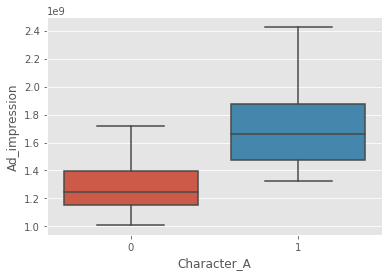

In [114]:
sns.boxplot(data=media, x='Character_A', y='Ad_impression')
plt.show()

In [115]:
vif = calc_VIF(X)
vif

,Features,VIF
1,Character_A,1.97
0,weekend,1.48
2,Ad_impression,0.11


In [116]:
#Ad impression in million
media['Ad_impression_mil'] = media['Ad_impression']/1000000

In [117]:
# X, y
X = media[['weekend', 'Character_A', 'Ad_impression_mil']]
vif = calc_VIF(X)
vif

,Features,VIF
2,Ad_impression_mil,2.48
1,Character_A,1.97
0,weekend,1.48


### Linear Regression Model 8 (Character A, weekend, ad_impression_mil, Cricket_match)

In [118]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Day_Counter', 'weekday',
       'weekend', 'Lag_views', 'Ad_impression_mil'],
      dtype='object')

In [119]:
# X, y
X = media[['weekend', 'Character_A', 'Ad_impression_mil', 'Cricket_match_india']]
y = media['Views_show']

In [120]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lm8 = sm.OLS(y, X_sm)
lm8_model = lm8.fit()
lm8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.02e-25
Time:                        15:20:01   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.633e+05    4.8e+04     -5.484      0.000   -3.59e+05   -1.68e+05
weekend              1.521e+05    1.9e+04      7.987      0.000    1.14e+05     1.9e+05
Character_A         -3.196e+04   2.19e+04     -1.457      0.149   -7.57e+04    1.17e+04
Ad_impression_mil     363.7938     37.113      9.802      0.000     289.861     437.727
Cricket_match_india -1.396e+04   2.74e+04     -0.510      0.612   -6.85e+04    4.06e+04
==============================================================================
Omnibus:                        5.270   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.560
Skew:                           0.468   Prob(JB):                        0.102
Kurtosis:                       3.701   Cond. No.                     9.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
vif = calc_VIF(X)
vif

,Features,VIF
2,Ad_impression_mil,2.77
1,Character_A,2.15
0,weekend,1.49
3,Cricket_match_india,1.19


### Linear Regression Model 9 (Character A, weekend, ad_impression_mil)

In [122]:
# X, y
X = media[['weekend', 'Character_A', 'Ad_impression_mil']]
y = media['Views_show']

In [123]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lm9 = sm.OLS(y, X_sm)
lm9_model = lm9.fit()
lm9_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.05e-26
Time:                        15:20:01   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
weekend             1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A        -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression_mil   364.4670     36.909      9.875      0.000     290.957     437.977
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression Model 10: Weekend & Ad_impressions

In [124]:
# X, y
X = media[['weekend', 'Ad_impression_mil']]
y = media['Views_show']

In [125]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lm10 = sm.OLS(y, X_sm)
lm10_model = lm10.fit()
lm10_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.95e-27
Time:                        15:20:01   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.302e+05   4.01e+04     -5.744      0.000    -3.1e+05    -1.5e+05
weekend            1.551e+05   1.87e+04      8.282      0.000    1.18e+05    1.92e+05
Ad_impression_mil   330.9993     28.203     11.736      0.000     274.840     387.159
==============================================================================
Omnibus:                        4.941   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.423
Skew:                           0.399   Prob(JB):                        0.110
Kurtosis:                       3.831   Cond. No.                     7.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
vif = calc_VIF(X)
vif

,Features,VIF
0,weekend,1.48
1,Ad_impression_mil,1.48


In [127]:
print (lm10_model.params)

const               -230169.825425
weekend              155082.530234
Ad_impression_mil       330.999312
dtype: float64


## Error Analysis Model 10

In [128]:
y_pred_model = lm10_model.predict(X_sm)

In [129]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_mod = r2_score(y_true=y, y_pred=y_pred_model)
rss_mod = mean_squared_error(y_true=y, y_pred=y_pred_model)
print ('{:.4f} is the R-squared'.format(r2_mod))
print ('{:.4f} is the RSS'.format(rss_mod))

0.7976 is the R-squared
4797239258.8244 is the RSS


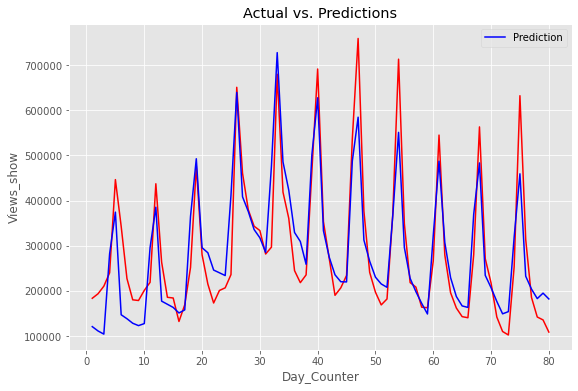

In [130]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(x=media.Day_Counter, y=y, color='r')
sns.lineplot(x=media.Day_Counter, y=y_pred_model,color="b", label="Prediction")
plt.title ('Actual vs. Predictions')
plt.show()

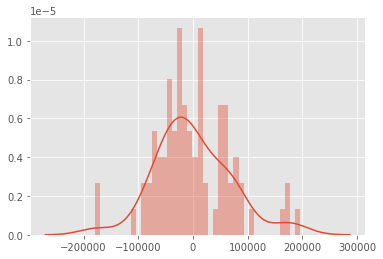

In [131]:
res = y-y_pred_model
sns.distplot(res,bins=40)
plt.show()

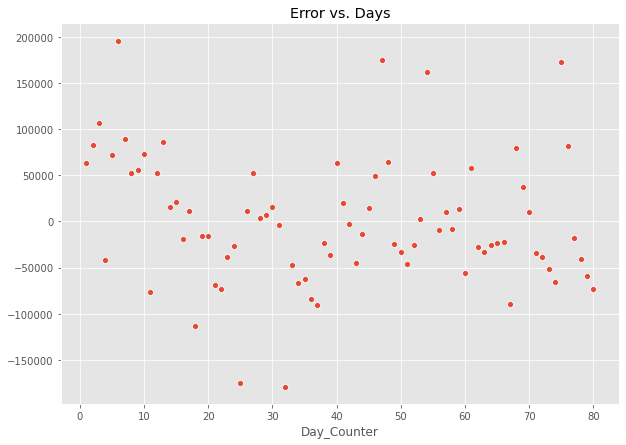

In [132]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=media.Day_Counter, y=res)
plt.title('Error vs. Days')
plt.show()

In [133]:
print ('mean of error', res.mean())

mean of error 2.2213498596102e-08


## Error Analysis Model 3

In [134]:
X = media[['Visitors','weekend', 'Character_A']]
X_sm = sm.add_constant(X)
y_pred_model = lm3_model.predict(X_sm)

In [135]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_mod = r2_score(y_true=y, y_pred=y_pred_model)
rss_mod = mean_squared_error(y_true=y, y_pred=y_pred_model)
print ('{:.4f} is the R-squared'.format(r2_mod))
print ('{:.4f} is the RSS'.format(rss_mod))

0.5859 is the R-squared
9815432480.4515 is the RSS


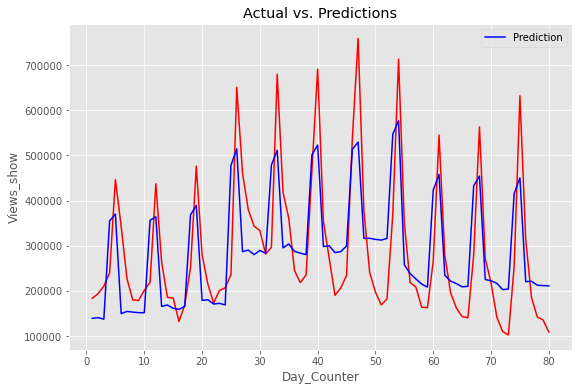

In [136]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(x=media.Day_Counter, y=y, color='r')
sns.lineplot(x=media.Day_Counter, y=y_pred_model,color="b", label="Prediction")
plt.title ('Actual vs. Predictions')
plt.show()

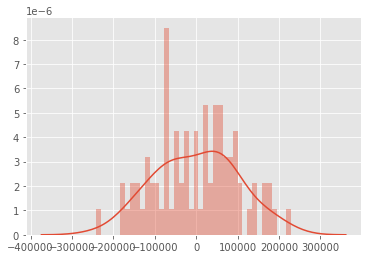

In [137]:
res = y-y_pred_model
sns.distplot(res,bins=40)
plt.show()

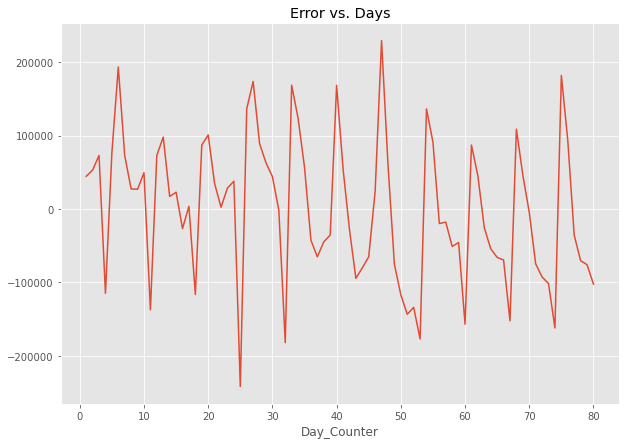

In [138]:
plt.figure(figsize=(10,7))
sns.lineplot(x=media.Day_Counter, y=res)
plt.title('Error vs. Days')
plt.show()